# Iksan

In [ ]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import combineArray, multiArraySort, data_loader_from_csv, data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

# Iksan - Spring: 3D Analysis (Distance, Frequency - Pathloss)

In [ ]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sp_400.csv', np.log10(400), 'dist' ,100)
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sp_1399.csv', np.log10(1399),'dist', 100)
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sp_2249.csv', np.log10(2249),'dist', 100)

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

X_train_m_400

In [ ]:
%autoreload
dataX_m = list()
dataY_m = list()
dataX_m.append(X_train_m_400)
dataY_m.append(y_train_m_400)
dataX_m.append(X_train_m_1399)
dataY_m.append(y_train_m_1399)
dataX_m.append(X_train_m_2249)
dataY_m.append(y_train_m_2249)

In [ ]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60, 60, 60, 60, 60), 'relu', 'lbfgs')

print("<Iksan - Spring> Relu (No filtering)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_m_400, y_train_m_400),mlp_prediction_error(model,X_val_m_400, y_val_m_400),
                 mlp_prediction_error(model,X_train_m_1399, y_train_m_1399),mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_train_m_2249, y_train_m_2249),mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_train_m, y_train_m), mlp_prediction_error(model,X_val_m, y_val_m)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'logistic', 'lbfgs')

print("<Iksan - Spring> Logistic Sigmoid (No filtering)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_m_400, y_train_m_400),mlp_prediction_error(model,X_val_m_400, y_val_m_400),
                 mlp_prediction_error(model,X_train_m_1399, y_train_m_1399),mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_train_m_2249, y_train_m_2249),mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_train_m, y_train_m), mlp_prediction_error(model,X_val_m, y_val_m)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

In [ ]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'tanh', 'lbfgs')

print("<Iksan - Spring> Tangent Hyperbolic (No filtering)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_m_400, y_train_m_400),mlp_prediction_error(model,X_val_m_400, y_val_m_400),
                 mlp_prediction_error(model,X_train_m_1399, y_train_m_1399),mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_train_m_2249, y_train_m_2249),mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_train_m, y_train_m), mlp_prediction_error(model,X_val_m, y_val_m)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

# Summer: Distance - Pathloss

In [ ]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_sm_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_sm_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_sm_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

# Winter: Distance-Pathloss

In [39]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_iksan_wt_400.csv', np.log10(400), 'dist' ,3)
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_iksan_wt_1399.csv', np.log10(1399),'dist', 3)
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_iksan_wt_2249.csv', np.log10(2249),'dist', 3)

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

X_train_m_400

109210
13240
Covariance Matrix
           dist      ploss   height
dist    0.66829    6.46991  0.01753
ploss   6.46991  199.79524  0.18395
height  0.01753    0.18395  0.02862
--------------------------------------------------
Preprocessing <data/PLdata_iksan_wt_400.csv>...Total 13240
- moving type: total: 9669 (training: 7735/validation: 1934)
- stationary type: total: 3571 (training: 2856/validation: 715)
109060
13178
Covariance Matrix
           dist      ploss   height
dist    0.66230    7.64274  0.01745
ploss   7.64274  281.14171  0.25075
height  0.01745    0.25075  0.02875
--------------------------------------------------
Preprocessing <data/PLdata_iksan_wt_1399.csv>...Total 13178
- moving type: total: 9607 (training: 7685/validation: 1922)
- stationary type: total: 3571 (training: 2856/validation: 715)
108873
13109
Covariance Matrix
           dist      ploss   height
dist    0.65516    7.31038  0.01735
ploss   7.31038  306.83006  0.23206
height  0.01735    0.23206  0.02890
----

array([[2.24150665, 2.60205999],
       [2.24225171, 2.60205999],
       [2.24232335, 2.60205999],
       ...,
       [3.47693556, 2.60205999],
       [3.47701971, 2.60205999],
       [3.47708146, 2.60205999]])

In [40]:
%autoreload
dataX_m = list()
dataY_m = list()
dataX_m.append(X_train_m_400)
dataY_m.append(y_train_m_400)
dataX_m.append(X_train_m_1399)
dataY_m.append(y_train_m_1399)
dataX_m.append(X_train_m_2249)
dataY_m.append(y_train_m_2249)

<Iksan - Winter> Relu (dist<=3000m)


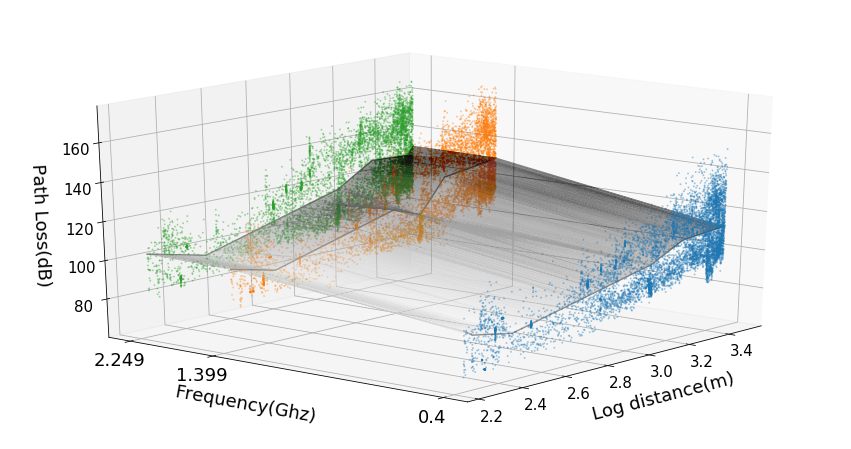

89.0629152420969
2001
7
1


RMSE(dB),train error,val error
0.4Ghz,11.94526,11.88668
1.399Ghz,13.78041,13.91897
2.249Ghz,14.21940,14.92689
Overall,13.34638,13.62957


In [36]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60, 60, 60, 60, 60), 'relu', 'lbfgs')

print("<Iksan - Winter> Relu (dist<=3000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_m_400, y_train_m_400),mlp_prediction_error(model,X_val_m_400, y_val_m_400),
                 mlp_prediction_error(model,X_train_m_1399, y_train_m_1399),mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_train_m_2249, y_train_m_2249),mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_train_m, y_train_m), mlp_prediction_error(model,X_val_m, y_val_m)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

<Iksan - Winter> Logistic Sigmoid (dist<=3000m)


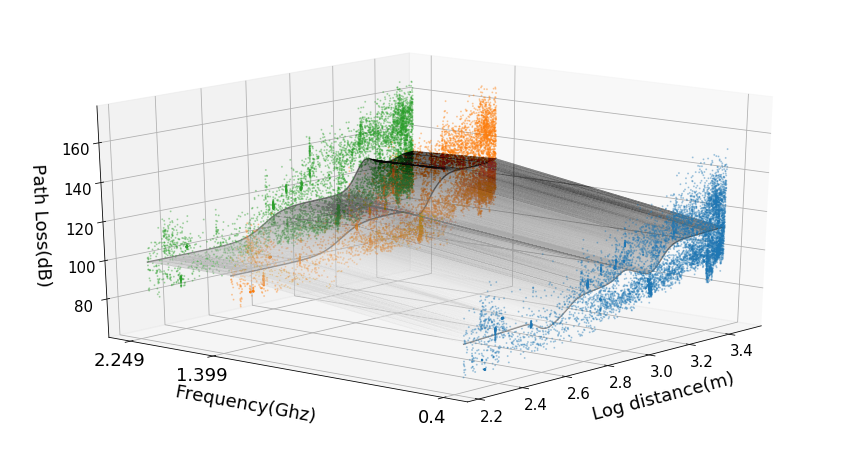

88.05302510943947
2001
3
1


RMSE(dB),train error,val error
0.4Ghz,11.81208,11.72027
1.399Ghz,13.80244,13.93508
2.249Ghz,14.09558,14.75762
Overall,13.27050,13.52529


In [37]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'logistic', 'lbfgs')

print("<Iksan - Winter> Logistic Sigmoid (dist<=3000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_m_400, y_train_m_400),mlp_prediction_error(model,X_val_m_400, y_val_m_400),
                 mlp_prediction_error(model,X_train_m_1399, y_train_m_1399),mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_train_m_2249, y_train_m_2249),mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_train_m, y_train_m), mlp_prediction_error(model,X_val_m, y_val_m)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))

<Iksan - Winter> Tangent Hyperbolic (dist<=3000m)


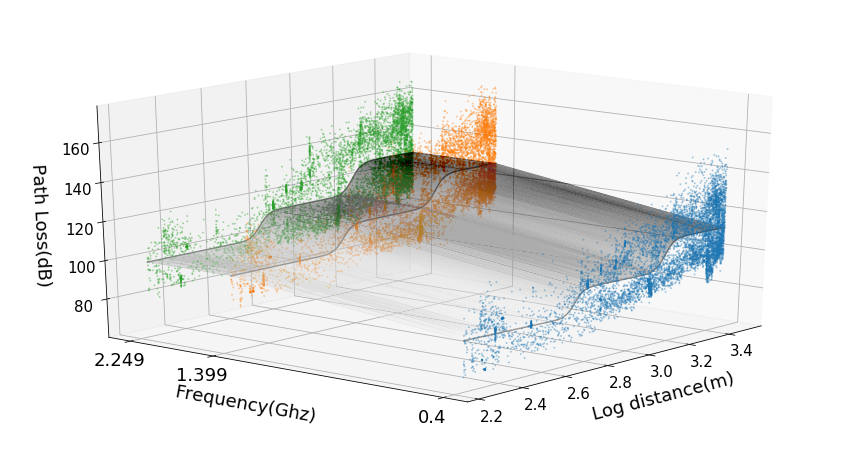

88.73149947624007
309
3
1


RMSE(dB),train error,val error
0.4Ghz,11.88813,11.74704
1.399Ghz,13.86527,14.00599
2.249Ghz,14.11404,14.76227
Overall,13.32152,13.55914


In [38]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'tanh', 'lbfgs')

print("<Iksan - Winter> Tangent Hyperbolic (dist<=3000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
stat = np.array([mlp_prediction_error(model,X_train_m_400, y_train_m_400),mlp_prediction_error(model,X_val_m_400, y_val_m_400),
                 mlp_prediction_error(model,X_train_m_1399, y_train_m_1399),mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_train_m_2249, y_train_m_2249),mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_train_m, y_train_m), mlp_prediction_error(model,X_val_m, y_val_m)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['train error','val error'],name='RMSE(dB)')))